In [1]:
install.packages("hdm")
library(hdm)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘Rcpp’, ‘RcppEigen’, ‘glmnet’, ‘checkmate’, ‘Formula’




 # Proof of Neyman Orthogonality condition

We have the following linear regression:

$$Y = \alpha D + \beta W' + \epsilon$$

Where: $\alpha$ is the target paramter, $\gamma_{DW}'$ is the estimator of lasso regression D on W and $\gamma_{YW}'$ is the estimator of lasso regression Y on W. On the other hand, $\tilde{Y}$ and $\tilde{D}$ are residuals from the estimation:

$$\tilde{Y} = Y-\gamma_{YW}'W$$

$$\tilde{D} = D- \gamma_{DW}'W$$

Then, we get the vector $\eta^{0}$ with true values:
$$\eta^{0} = (\gamma_{DW}',\gamma_{YW}')'$$

In this case, $\alpha$ is a function of $\eta$, so $\alpha=\alpha(\eta)$ and $\eta=(\eta_{1}',\eta_{2}')$

We want to demonstrate that, in first orden, $\alpha$ is insensitive to local perturbations around the true value $\eta^{0}$.

$$D = \dfrac {\partial \alpha(\eta^{0})}{\partial \eta}=0$$

Let's propose:
$$\tilde{Y} = a \tilde{D} + \mu$$

where $\alpha=\arg\min_{a \in \mathbb R}E(\tilde{Y}-a\tilde{D})^2$. $\alpha$ is the true value of $a$, since $a=\alpha$ solves the equation:

$$E(\tilde{Y}-a\tilde{D})\tilde{D}=0$$

Based on the following condition (equation number 1):

$$M(a,\eta)=E[(\tilde{Y}(\eta_{1})-a\tilde{D}(\eta_{2}))\tilde{D}(\eta_{2})]$$

Where: $\tilde{Y}(\eta_{1})=Y-\eta_{1}'W$ and $\tilde{D}(\eta_{2})=D-\eta_{2}'W$.

Corresponding to the true values $\eta=\eta^{0}$:

$$\tilde{Y}=Y-\gamma_{YW}'W ; \tilde{D}=D-\gamma_{DW}'W$$

By the implicit function theorem:

$$\dfrac {\partial a}{\partial \eta}=-\partial_{a}M(\alpha,\eta^{0})^{-1}\partial_{\eta}M(\alpha,\eta^{0})$$

Remember that we want to demonstrate $\dfrac {\partial \alpha(\eta^{0})}{\partial \eta}=0$

As we observe, the first component $\partial_{a}M(\alpha,\eta^{0})$ can not be zero, so to get what we want, $\partial_{\eta}M(\alpha,\eta^{0})$ must be zero.

The second componet is:

$$\dfrac {\partial M(\alpha,\eta^{0})}{\partial \eta}=\dfrac {\partial M(\alpha,\eta^{0})}{\partial \eta_{1}}+\dfrac {\partial M(\alpha,\eta^{0})}{\partial \eta_{2}}$$

Also We will refer to  $\dfrac {\partial M(\alpha,\eta^{0})}{\partial \eta_{1}}$ as $S_{1}$ and   $\dfrac {\partial M(\alpha,\eta^{0})}{\partial \eta_{2}}$ as $S_{2}$

Solving  $S_{1}$ :

$$\dfrac {\partial M(\alpha,\eta^{0})}{\partial \eta_{1}}=E[\dfrac {\partial \tilde{Y}(\eta_{1})}{\partial \eta_{1}}\tilde{D}] $$

As we know: $\tilde{Y} = Y-\eta_{1}'W$

$$\dfrac {\partial \tilde{Y}}{\partial \eta_{1}}=-W $$

Then:

$$\dfrac {\partial M(\alpha,\eta^{0})}{\partial \eta_{1}}=E[-W\tilde{D}]=0$$

Now we solve $S_{2}$:

$$\dfrac {\partial M(\alpha,\eta^{0})}{\partial \eta_{2}}=E[(-a\dfrac {\partial \tilde{D}(\eta_{2})}{\partial \eta_{2}})\tilde{D} + \dfrac {\partial \tilde{D}(\eta_{2})}{\partial \eta_{2}}(\tilde{Y}-a\tilde{D})] $$

As we know: $\tilde{D} = D-\eta_{2}'W$

$$\dfrac {\partial \tilde{D}}{\partial \eta_{2}}=-W $$

Then:

$$\dfrac {\partial M(\alpha,\eta^{0})}{\partial \eta_{2}}=E[-a(-W)\tilde{D}+(-W)(\tilde{Y}-a\tilde{D})] $$

$$\dfrac {\partial M(\alpha,\eta^{0})}{\partial \eta_{2}}=-E(W\tilde{Y})+2E(\alpha W\tilde{D})=0 $$

Thus, we have demonstrated that  $S_{1}=0$ and $S_{2}=0$ are indeed true. Additionally, we have shown that $\dfrac {\partial \alpha(\eta^{0})}{\partial \eta}=0$.




In [ ]:
set.seed(1)

B = 100 # trials
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){

n=1000
p= 100
beta = 1/(1:p)^2
gamma = 1/(1:p)^2

X=matrix(rnorm(n*p), n, p)


D=   X%*%gamma + rnorm(n)/4

Y = 10*D+ X%*%beta + rnorm(n)

# single selection method

SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso


if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}

if (sum(SX.IDs)!= 0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}



#partialling out

resY = rlasso(Y~ X, Post=F)$res
resD = rlasso(D~ X, Post=F)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}

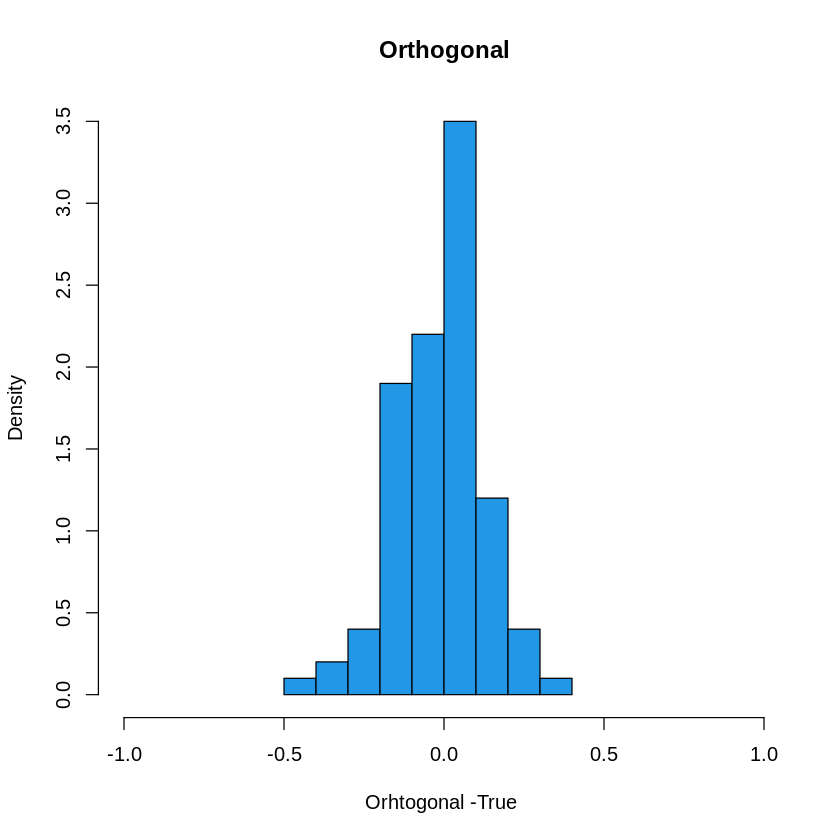

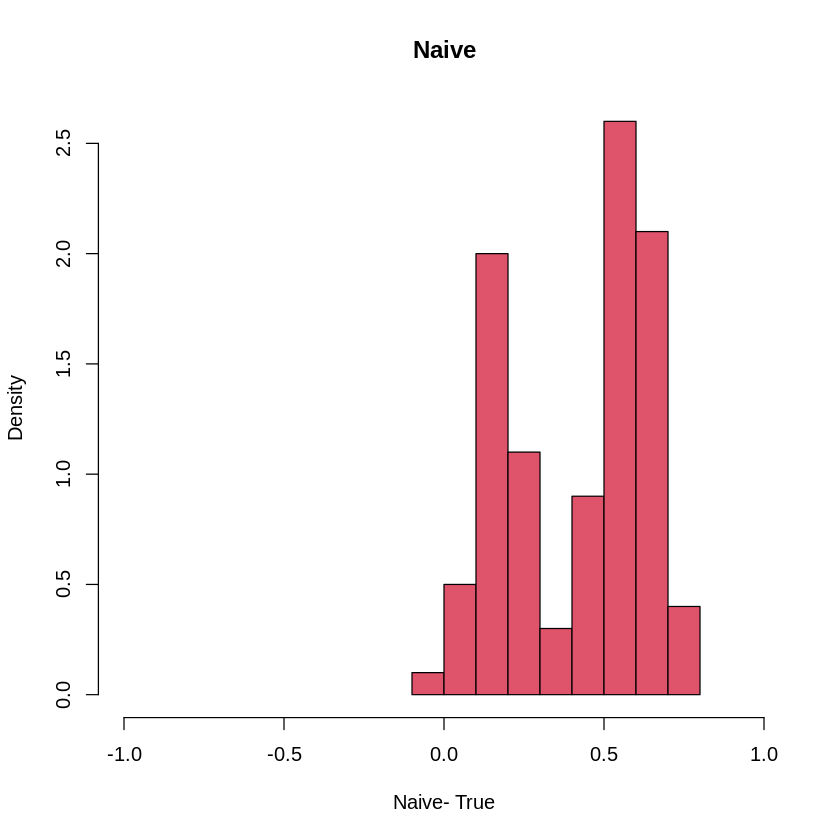

In [ ]:
hist(Orthogonal-10,col=4, freq=F, xlim= c(-1, 1), xlab= "Orhtogonal -True ", main="Orthogonal")
hist(Naive-10, col=2, freq=F, xlim= c(-1,1), xlab= "Naive- True", main = "Naive")

In [2]:
set.seed(1)
B= 1000 # trials
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){

n=100
p= 100
beta = 1/(1:p)^2
gamma =1/(1:p)^2

X=matrix(rnorm(n*p), n, p)


D=   X%*%gamma + rnorm(n)/4

Y =  10*D+ X%*%beta + rnorm(n)

# single selection method

SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso


if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}

if (sum(SX.IDs)>0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}



#partialling out

resY = rlasso(Y~ X, Post=T)$res
resD = rlasso(D~ X, Post=T)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}


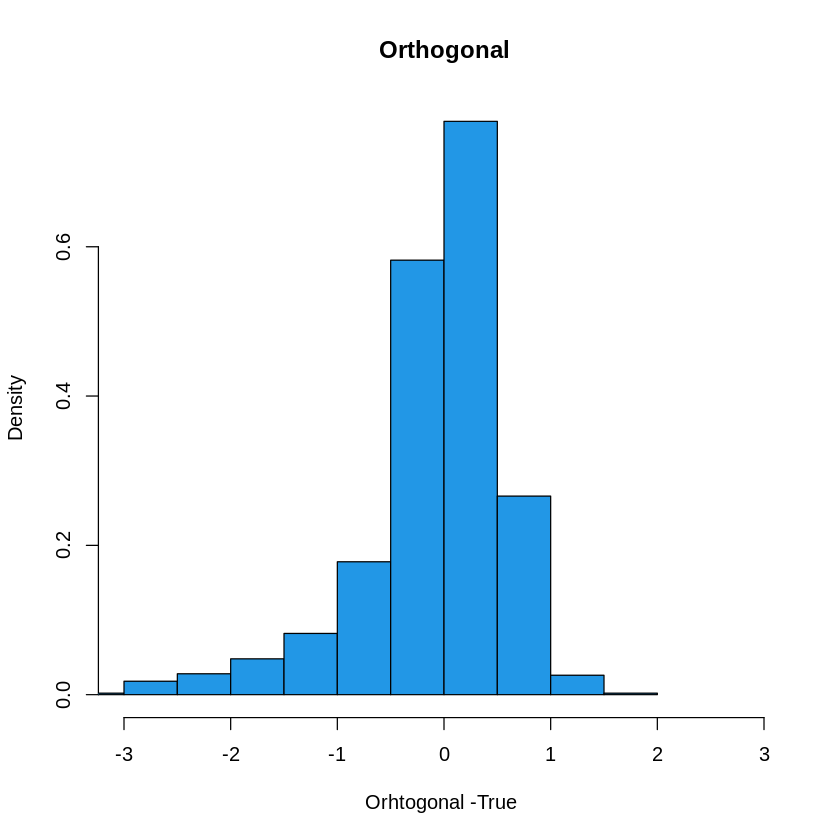

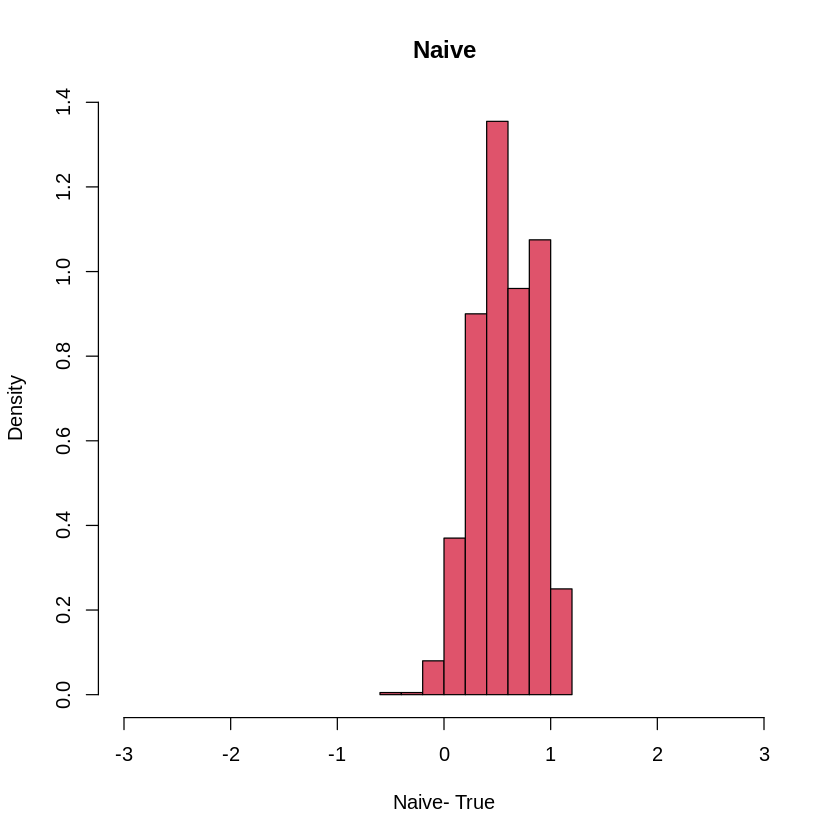

In [4]:
hist(Orthogonal-10,col=4, xlim= c(-3, 3), freq=F, xlab= "Orhtogonal -True ", main="Orthogonal")
hist(Naive-10, col=2, freq=F,, xlim= c(-3, 3), xlab= "Naive- True", main = "Naive")


In [ ]:
set.seed(1)
B= 10000 # trials
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){

n=100
p= 100
beta = 1/(1:p)^2
gamma =1/(1:p)^2

X=matrix(rnorm(n*p), n, p)


D=   X%*%gamma + rnorm(n)/4

Y =  10*D+ X%*%beta + rnorm(n)

# single selection method

SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso


if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}

if (sum(SX.IDs)>0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}



#partialling out

resY = rlasso(Y~ X, Post=T)$res
resD = rlasso(D~ X, Post=T)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}


In [ ]:
hist(Orthogonal-10,col=4, freq=F, xlim= c(-2, 2), xlab= "Orhtogonal -True ", main="Orthogonal")
hist(Naive-10, col=2, freq=F, xlim= c(-2,2), xlab= "Naive- True", main = "Naive")


The Orthogonal estimator significantly surpasses the Naive estimator in reducing bias. By incorporating adjustments for confounding variables in $X$, the Orthogonal technique ensures more precise and trustworthy estimates of the treatment effect. This analysis underlines the critical role of including confounding variables in causal analysis and illustrates how orthogonal learning methods effectively minimize bias.

Overall, this analysis reiterates the importance of precise model specification and the necessity to account for confounding factors when assessing causal effects. Through careful consideration of these factors, the Orthogonal method provides a reliable method for securing unbiased estimates.